В этом модуле мы перейдём к изучению реальных алгоритмов анализа данных и рассмотрим с разных сторон:

    - задачу построения линейной регрессионной модели, начав с классической модели метода наименьших квадратов (МНК или OLS, Ordinary Least Squares);
    - проблемы, которые при этом возникают (например, зависимость факторов или чересчур большое их количество);
    - математические алгоритмы (например, спектральный анализ, метод главных компонент и сингулярное разложение), которые помогают решить возникающие проблемы.


# Неоднородные СЛАУ

Мы начнем с алгоритма классической линейной регрессии по методу наименьших квадратов (Ordinary Least Squares, OLS) или OLS регрессии.

Это самый базовый алгоритм, но даже он уже не очень прост для восприятия, поэтому мы разобьём сложносоставную задачу линейного прогнозирования на две части:

- алгоритм — решение неоднородных систем линейных уравнений или СЛАУ;
- контекст задачи прогнозирования.

В решении СЛАУ возможно 3 случая:

    - «Идеальная пара»
    Это так называемые определённые системы, имеющие единственное решение.
    - «В активном поиске»
    Недоопределённые системы, в которых решений бесконечно много.
    - «Всё сложно»
    Это переопределённые системы, в которых решений нет вовсе


## Случай «Идеальная пара»

Резюме

Пусть у нас есть квадратная система с k неизвестными.
            - Aw=b
Если rk(A) = rk(A|b) = k, то:
    1. в системе ровно столько независимых уравнений, сколько и неизвестных;
    2. существует одно единственное решение w = (w1,...,wk);
    3. вектор свободных коэффициентов b линейно зависим со столбцами A;
    4. разложение вектора b по столбцам A единственно.


Решить систему линейных уравнений

4x+7y=20

5x+10y=30

Решение производится методом обратной матрицы

Сперва находим обратнуя матрицу по формуле: 1/(a*d-b*c) * ([d,-b],[-c,a])

После применения метода обратной матрицы получим следующую матрицу

2 -7/5

-1 4/5

* 
20

30

Ответ: [-2, 4]

### Случай "В активном поиске"

Aw = b

Если rk(A) = rk(A|b)<k, то
    1. не хватает уравнений => бесконечное количество решений
    2. вектор b линейно зависим со столбцами А
    3. разложение вектора b по столбцам А Неединственно

Задания

Сколько решений имеет система уравнений

4w1 + 7w2 - w3 = 7

2w1 + w2 + w3 = 2

Ответ:Бесконечно много, так как в ней 2 непротиворечивых уравнения на 3 неизвестных верно 

### Случай "Всё сложно"

Ссылки на фото в папке (Задача 1 Всё сложно часть 1.png и Задача 2 Всё сложно часть 1.png)

Главное правило при котором у системы уравнений нет решений это:
    rk(A) < rk(A|b)
   Критерий переопределенности системы уравнений: ранг матрицы коэффициентов меньше ранга расширенной матрицы.

В переопределенной системе Aw = b обязательно:
    1. Ранг расширенной матрицы больше ранга A
    2. Нет точных решений 
    3. Столбец свободных коэффициентов независим со столбцами матрицы A 

Aw = b
Если rk(A) < rk(A|b), то
    1. нет точных решений
    2. вектор b линейно независим со столбцами А
    3. разложение вектора b по столбцам А невозможно
    4. есть приближённые решения
    5. OLS оценка w^ = (A.T*A)^-1 * A.T*b
    6. идея: ортогональная проекция

Вычислите вектор ошибок для приближённого решения системы w, если
w1-5w2=1

2w1+w2=2

w1+w2=2

w^=[1,1]

In [7]:
a = np.array([[1,-5],
              [2,1],
              [1,1]])
b = np.array([1,1])

In [8]:
np.dot(a,b)

array([-4,  3,  2])

In [9]:
np.array([1,2,2]) - np.dot(a,b)

array([ 5, -1,  0])

В OLS оценке коэффициентов переопределенной СЛАУ:
    1. Вектор ошибок ортогонален столбцам А 
    2. Вектор ошибок имеет минимальную длину из всех возможных 
    3. Вектор ошибок e = b - Aw^

Найдите OLS оценку для коэффициентов w1, w2 СЛАУ

In [11]:
a = np.array([1,2])
b = np.array([-3,1])
c = np.array([1,2])
d = np.array([1,-1])
A = np.array([a,b,c,d])

In [13]:
vector_w = np.array([1,4,5,0])

In [76]:
#A.T * b
right = A.T@vector_w
#A.T*A (Gramm matrix)
left = A.T@A
print(right)
print(left)

[-6 16]
[[12  0]
 [ 0 10]]


In [77]:
#(A.T*A)^-1
left = np.linalg.inv(left)
left

array([[0.08333333, 0.        ],
       [0.        , 0.1       ]])

In [79]:
#w^ - Ordinary Least Squares
w_ = left@right
w_

array([-0.5,  1.6])

## Классическая OLS линейная регрессия

Постановка задачи

y — целевая переменная

x1,...,xk — признаки/ факторы/ регрессоры

Поставить задачу — означает ответить на два вопроса: ***что у нас есть? и что мы хотим?***

У нас есть N наблюдений, это значит что и целевая переменная, и признаки представлены векторами из пространства R^N,то есть у каждого вектора N координат

Мы предполагаем, что связь между целевой переменной и признаками линейная:

y = w0 + w1*x1 + w2x2 + ... + wk*xk

Здесь w0, w1,...,wk обозначают веса. Наличие коэффициента w0 говорит о том, что мы строим регрессию с константой, или, как иногда говорят, с интерсептом (intercept). Это скалярное равенство, коэффициенты wi неизвестны. Мы бы очень хотели, чтобы оно выполнялось для всех наблюдений.

***Что мы хотим?***

Мы хотим иметь такие веса w, чтобы для каждого наблюдения наше линейное равенство было выполнено. А значит, у нас получается N уравнений на k+1 неизвестную. Как правило, N сильно больше k, и эта система переопределена, а значит, мы сможем найти только приближенное решение.

***Хотим***: наилучшую оценку для w0,w1,...,wk 

У нас появился новый вектор — вектор из N единиц, который здесь не просто так, а по причине того, что мы взяли модель с интерсептом и можем считать, что это новый регрессор–константа.

Для решения переопределенной системы составляем матрицу , записав в столбцы все регрессоры.

OLS оценка для w: w^ = (A.T*A)^-1*A.T*y

**Сделаем прогноз.** Допустим, у нас есть новое наблюдение по регрессорам. Как предсказать значение целевой переменной? 

y_new^ = w0^ + w1^*x1_new + ... + wk^*xk_new

или

y_new^ = (w^,x_new)

В этой записи wi^ и x_new — это векторы размерности k+1. Чтобы предсказать значение целевой переменной, вычисляем скалярное произведение вектора значений признаков на вектор весов.

In [82]:
w0_ = -29.3
w1_ = -0.26
w2_ = 8.4
CRIM = 0.2
RM = 6
PRICE = w0_ + w1_*CRIM + w2_*RM
round(PRICE,3)

21.048

## Проблемы в классической OLS модели

***Когда возникают проблемы***
Заметим, что в уравнении классической OLS регрессии присутствует очень важный множитель A.T*A:

w^ = (A.T*A)^-1*A.T*y

Это матрица Грама значений признаков и дополнительного искусственного признака–константы. 

Свойства матрицы Грама:
    - симметричная
    - размер k+1 * k+1, что соответствует расширенному количеству факторов
    
У классической OLS регрессии есть ограничение: матрица A.T*A не должна быть вырождена или близка к вырожденной

***Задача***

Корректа ли модель классической OLS регрессии для:
    - y = [1,2,5,1]
    - x1 = [2,1,1,2]
    - x2 = [-2,-1,-1,-2]
Решение:
    Запишем матрицу А и составим А.Т*А:
    
        А = [[1,2,-2],
        
             [1,1,-1],
             
             [1,1,-1],
             
             [1,2,-2]]
             
        A.T*A = [[1,1,1,1] *   [[1,2,-2]
        
                 [2,1,1,2]      [1,1,-1]
                 
                 [-2,-1,-1,-2]] [1,1,-1]
                 
                                [1,2,-2]] =
                                
        [[4,6,-6]
        
         [6,10,-10]
         
         [-6,-10,10]]

Вторая и третья строки матрицы A.T*A пропорциональны ⇒ матрица вырождена ⇒ обратная не существует ⇒ классическая OLS модель для таких данных неприменима.

***Как быть?***

Борьба с вырожденностью A.T*A часто сводится к устранению «плохих», то есть зависимых признаков тем или иным способом.  Для этого анализируют корреляционную матрицу признаков или матрицу их значений.

Но иногда проблема может заключаться, например, в том, что один признак измерен в тысячных долях, а другой в тысячах единиц. Тогда коэффициенты при них могут отличаться в миллион раз.

Для устранения этой проблемы может помочь стандартизация данных.

In [91]:
x1 = np.array([1,1,0,2])
x2 = np.array([-1,1,0,0])
x3 = np.array([0,2,0,2])
A = np.array([x1,x2,x3]).T
y = np.array([1,2,1,2])

In [92]:
np.linalg.det(A.T@A)

0.0

Матрица А вырожденная следовательно нельзя найти классическую OLS оценку в модели целевой переменной y

## Стандартизация признаков

Стандартизация состоит из двух шагов:
    1. Центрирование Xcentr = X - Xmean
    2. Нормирование Xst = Xcentr/||Xcentr||

<img src="files/Стандартизация пример 1.png">

<img src="files/Стандартизация пример 2 ч1.png">

<img src="files/Стандартизация пример 2 ч2.png">

Стандартизировать x1 = [11,8]

In [93]:
x1 = np.array([11,8])

In [109]:
#Центрирование
x_centr = x1 - np.mean(x1)
#Нормирование
x_norm = np.linalg.norm(x_centr)
#Стандартизиваонный ответ
x_st = (1/x_norm)*x_centr
x_st

array([ 0.70710678, -0.70710678])

2.1213203435596424

## Корреляционная матрица

Корреляционная матрица — это матрица выборочных корреляций между факторами регрессии.:
    C = corr(X)

Корреляционная матрица измеряет тесноту линейной связи между факторами, а потому симметрична: CT = C. Мы будем рассматривать коэффициент корреляции Пирсона: элементы матрицы — это попарные корреляции факторов.

Cij = corr(xi, xj)

Проинтерпретируем выборочные коэффициенты корреляции:

corr(x,u) = 1 Прямая линейная зависимость 
corr(x,u) = 0.73 Сильная прямая взаимосвязь
corr(x,v) = -1 Обратная линейная зависимость
corr(x,v) = -0.73 Сильная обратная взаимосвязь
corr(x,w) = 0 Нет линейной связи
corr(x,w) = 0.12 Слабая прямая взимосвязь


Свойства:
    1. corr(factor, target) - чем больше по модулю корреляция между фактором и целевым параметром, тем лучшеё
    2. corr(factor1, factor2) - чем больше по модулю корреляция между факторами, тем хуже
    Чем больше линейно зависимых факторов, тем ниже ранг

Можно выделить два неприятных случая:
    1. ***Чистая коллениарность***
        - факторы линейно выражаются друг через друна
        - ранг матрицы факторов не максимальный
        - корреляции между факторами равны или близки к +-1
        - матрица корреляций вырождена
    2. ***Мультиколлинеарность***
        - факторы формально линейно зависимы
        - ранг матрицы факторов максимальный
        - корреляции между факторами равны или близки к +-1
        - матрица корреляций почти вырождена

Таким образом, чистая коллинеарность даёт больше проблем, но и более заметна. В то время как мультиколлинеарность может быть скрытой, и её не так легко обнаружить на глаз.

***Как обнаружить мультиколлинеарность***:
    - из контекста
    - определитель корреляционный матрицы близок к 0
    - стандартная регрессионная формула даёт странные результаты
    - спект матрицы корреляций и число обусловленности
***Как бороться с мультиколлинеарностью***:
    - исключить зависимые факторы "на глаз"
    - метод главных компонент для корреляционной матрицы
    - сингулярное разложение матрицы факторов
    - гребневая регрессия(ridge regression)

# Практика

In [110]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с  DataFrame
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
%matplotlib inline

In [111]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [112]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [113]:
# считаем матрицу корреляции
C = bostonDF.corr(method='pearson')
C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


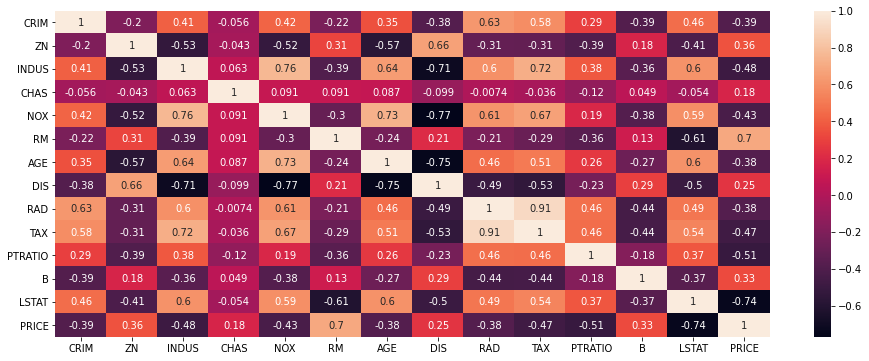

In [115]:
# представим корреляционную матрицу в виде "тепловой карты" 
plt.figure(figsize=(16,6))
sns.heatmap(data=C, annot=True)

***Построим регрессию***

In [116]:
Data = bostonDF[['CRIM', 'RM']]
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [117]:
np.shape(Data)

(506, 2)

In [118]:
# Создадим вектор из единиц для коэффициента w_0 и запишем все векторы в СТОЛБЦЫ матрицы признаков А
CRIM = Data['CRIM']
RM = Data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
A

array([[1.0000e+00, 6.3200e-03, 6.5750e+00],
       [1.0000e+00, 2.7310e-02, 6.4210e+00],
       [1.0000e+00, 2.7290e-02, 7.1850e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 6.9760e+00],
       [1.0000e+00, 1.0959e-01, 6.7940e+00],
       [1.0000e+00, 4.7410e-02, 6.0300e+00]])

In [119]:
# Добавим настройку для убобного чтения А
np.set_printoptions(suppress=True)
A

array([[1.     , 0.00632, 6.575  ],
       [1.     , 0.02731, 6.421  ],
       [1.     , 0.02729, 7.185  ],
       ...,
       [1.     , 0.06076, 6.976  ],
       [1.     , 0.10959, 6.794  ],
       [1.     , 0.04741, 6.03   ]])

In [120]:
# Создадим целевой вектор 
y = bostonDF[['PRICE']] # объект типа dataframe - то что нужно
y_s = bostonDF['PRICE'] # объект типа series не подойдёт

In [121]:
type(y)

pandas.core.frame.DataFrame

In [122]:
type(y_s)

pandas.core.series.Series

In [123]:
# вычислим OLS оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [124]:
# прогноз
# добавим данные по новогу городку
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0] + w_hat.iloc[1]*CRIM_new + w_hat.iloc[2]*RM_new
PRICE_new

PRICE    37.857335
dtype: float64

In [125]:
# короткий способ сделать прогноз
new = np.array([1, CRIM_new, RM_new])
new@w_hat

PRICE    37.857335
dtype: float64

In [126]:
# для того чтобы не наткнуться на ошибки при использовании inv используется следующий классический метод OLS 
np.linalg.lstsq(A,y,rcond=None)

(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

***Стандартизация данных***

In [130]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanCRIM = Data['CRIM'].mean()
meanRM = Data['RM'].mean()
mean_y = y.mean()
print('mean value of CRIM:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of PRICE:', mean_y)

mean value of CRIM: 3.613523557312254
mean value of RM: 6.284634387351779
mean value of PRICE: PRICE    22.532806
dtype: float64


In [131]:
# Центрирование
CRIM_c = Data['CRIM'] - meanCRIM
RM_c = Data['RM'] - meanRM
y_c = y - mean_y
print('CRIM до центрирования:\n', CRIM.head(4))
print('CRIM после центрирования:\n', CRIM_c.head(4))

CRIM до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIM после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64


In [132]:
# Убедимся что теперь вектор CRIM в среднем 0
print('среднее арифметическое вектора CRIM после центрирования:', CRIM_c.mean())

среднее арифметическое вектора CRIM после центрирования: -4.49355089808759e-16


In [133]:
# вычисляем длины вектором для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of CRIM:\n', CRIM_c_norm)

norm of CRIM:
 193.2956853903625


In [135]:
# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st = CRIM_c / CRIM_c_norm
RM_st = RM_c / RM_c_norm
y_st = y_c / y_c_norm
print('CRIM до центрирования:\n', CRIM.head(4))
print('CRIM после центрирования:\n', CRIM_c.head(4))
print('CRIM после нормирования:\n', CRIM_c_norm)
print('CRIM после стандартизирования:\n', CRIM_st.head(4))

CRIM до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIM после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64
CRIM после нормирования:
 193.2956853903625
CRIM после стандартизирования:
 0   -0.018662
1   -0.018553
2   -0.018553
3   -0.018527
Name: CRIM, dtype: float64


In [136]:
# Матрица центрированных признаков - БЕЗ константы!
A_st = np.column_stack((CRIM_st, RM_st,))
A_st

array([[-0.01866158,  0.01838996],
       [-0.01855299,  0.00863655],
       [-0.0185531 ,  0.05702358],
       ...,
       [-0.01837994,  0.04378681],
       [-0.01812732,  0.03226006],
       [-0.01844901, -0.01612696]])

In [139]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[-0.24775878],
       [ 0.64103965]])

In [140]:
# добавим данные по новому городку
CRIM_new = 0.1
RM_new = 8
# чтобы сделать прогноз по новым данным их нужно стандартизировать

In [141]:
# Стандартизация новых данных
CRIM_new_st = (CRIM_new - meanCRIM) / CRIM_c_norm
RM_new_st = (RM_new - meanRM) / RM_c_norm
print('new CRIM st:', CRIM_new_st)
print('new RM st:', RM_new_st)

new CRIM st: -0.018176937318681786
new RM st: 0.10864062828128407


In [142]:
# Прогноз для стандартизированного y
y_st_new = w_hat_st[0]*CRIM_new_st + w_hat_st[1]*RM_new_st
print('new PRICE st predict:', y_st_new)

new PRICE st predict: [0.07414645]


стандартизированный прогноз для нас может не иметь никакого смысла сам по себе поэтому необходимо пересчитать обратно. Для этого сделаем опреции, обратные стандартизации - умножим на длину центрированного вектора y и прибавим среднее

In [143]:
# Пересчёт стандартизированного прогноза в понятный
y_new = y_st_new * y_c_norm + mean_y
print('new PRICE predict:', y_new)

new PRICE predict: PRICE    37.857335
dtype: float64


In [144]:
# Допустим нужно вернуть всё обратно
# Пересчёт стандартизированных коэффициентов в обычные
# здесь создаём вектр единиц, который далее заполним нужными занчениями
w_hat_not_st = np.ones((3,1))

In [145]:
w_hat_not_st[0] = (-w_hat_st[0] * meanCRIM / CRIM_c_norm - w_hat_st[1] * meanRM / RM_c_norm) * y_c_norm + y.mean()
w_hat_not_st[1] = (w_hat_st[0] / CRIM_c_norm) * y_c_norm
w_hat_not_st[2] = (w_hat_st[1] / RM_c_norm) * y_c_norm
w_hat_not_st

array([[-29.24471945],
       [ -0.26491325],
       [  8.39106825]])

In [146]:
# Сравнение с ранее полученными обычными коэффициентами
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [147]:
# Матрица Грама стандартизированных признаков
A_st.T@A_st

array([[ 1.       , -0.2192467],
       [-0.2192467,  1.       ]])

In [148]:
# Матрица корреляций обычных признаков
Data.corr(method='pearson')

,CRIM,RM
CRIM,1.000000,-0.219247
RM,-0.219247,1.000000


Видим что матрица Грама стандартизированных признаков и есть корреляционная матрица обычных признаков

In [149]:
# Стандартизированный признаки ортогональны вектору констант

In [150]:
CRIM_st@np.ones(506)

-2.67841304690819e-15

In [151]:
RM_st@np.ones(506)

-2.1649348980190553e-15

# Задачи

В датасете Admission_Predict_Ver1.1.csv находятся данные об абитуриентах и вероятности приёма их в магистратуру.

Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [153]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [154]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [155]:
len(data)

500

In [156]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [158]:
# считаем матрицу корреляции
C = data[['GRE Score', 'TOEFL Score', 
          'University Rating', 'SOP',
          'LOR ', 'CGPA', 'Research', 
          'Chance of Admit ']].corr(method='pearson')
C

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


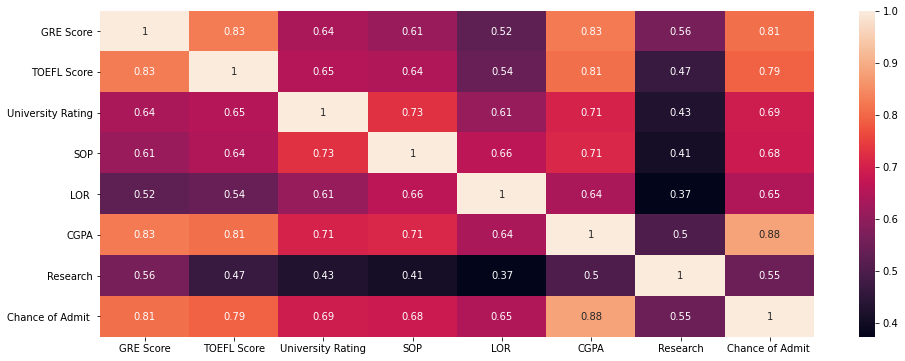

In [159]:
# представим корреляционную матрицу в виде "тепловой карты" 
plt.figure(figsize=(16,6))
sns.heatmap(data=C, annot=True)

Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).

In [160]:
research_0 = data[data.Research == 0]
research_1 = data[data.Research == 1]

In [161]:
# считаем матрицу корреляции
C_research_0 = research_0[['GRE Score', 'TOEFL Score', 
                           'University Rating', 'SOP',
                           'LOR ', 'CGPA', 'Research', 
                           'Chance of Admit ']].corr(method='pearson')
C_research_1 = research_1[['GRE Score', 'TOEFL Score', 
                           'University Rating', 'SOP',
                           'LOR ', 'CGPA', 'Research', 
                           'Chance of Admit ']].corr(method='pearson')

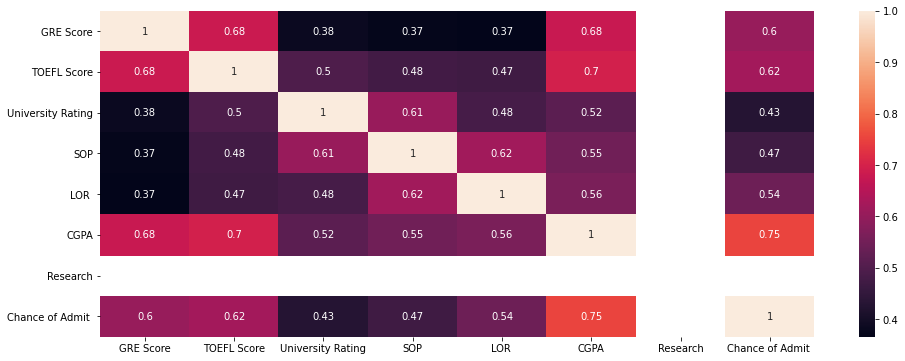

In [162]:
# представим корреляционную матрицу в виде "тепловой карты" 
plt.figure(figsize=(16,6))
sns.heatmap(data=C_research_0, annot=True)

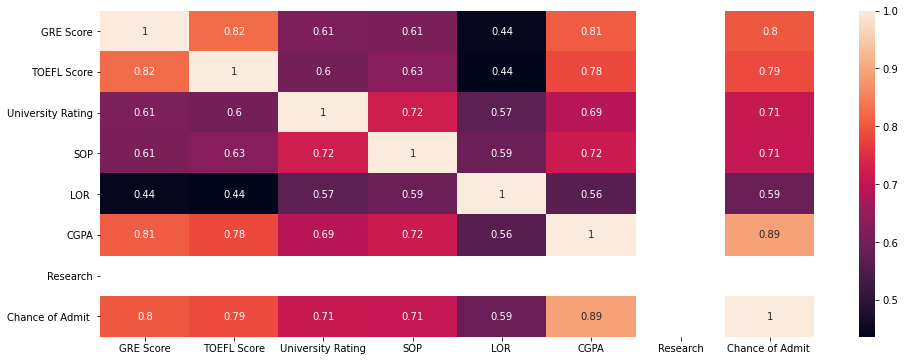

In [163]:
# представим корреляционную матрицу в виде "тепловой карты" 
plt.figure(figsize=(16,6))
sns.heatmap(data=C_research_1, annot=True)

Постройте OLS регрессию Chance of Admission на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [169]:
# Создадим вектор из единиц для коэффициента w_0 и запишем все векторы в СТОЛБЦЫ матрицы признаков А
TOEFL_Score = research_0['TOEFL Score']
CGPA = research_0['CGPA']
A = np.column_stack((np.ones(220), TOEFL_Score, CGPA))
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [172]:
# Создадим целевой вектор 
y = research_0[['Chance of Admit ']] # объект типа dataframe - то что нужно

In [174]:
# Посчитаем OLS регрессию для целевой переменной
ols_regression = np.linalg.lstsq(A,y,rcond=None)

Прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1, используя модель, полученную в задаче 2.11.6 (используйте округленные значения признаков).

In [185]:
# делаем прогноз шансов поступления в университет
TOEFL_Score = 107
CGPA = 9.1

chance_new = np.array([round(ols_regression[0][0][0],3)]) + np.array([round(ols_regression[0][1][0],3)])*TOEFL_Score + np.array([round(ols_regression[0][2][0],3)])*CGPA
round(chance_new[0],2)

0.73

Аналогично задаче 2.11.6 постройте OLS регрессию Chance of Admission на выбранные в задаче 2.11.5 признаки, однако теперь сперва стандартизируйте эти признаки.

In [188]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanTOEFL_Score = research_0['TOEFL Score'].mean()
meanCGPA = research_0['CGPA'].mean()
mean_y = y.mean()
print('mean value of CRIM:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of Chance of Admit:', mean_y.values[0])

mean value of CRIM: 3.613523557312254
mean value of RM: 6.284634387351779
mean value of Chance of Admit: 0.634909090909091


In [189]:
# Центрирование
TOEFL_Score_c = research_0['TOEFL Score'] - meanTOEFL_Score
CGPA_c = research_0['CGPA'] - meanCGPA
y_c = y - mean_y
print('TOEFL_Score после центрирования:\n', TOEFL_Score_c.head(4))

TOEFL_Score после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64


In [190]:
# Убедимся что теперь вектор CRIM в среднем 0
print('среднее арифметическое вектора TOEFL_Score после центрирования:', TOEFL_Score_c.mean())

среднее арифметическое вектора TOEFL_Score после центрирования: 5.9427210627208375e-15


In [191]:
# вычисляем длины вектором для нормирования
TOEFL_Score_c_norm = np.linalg.norm(TOEFL_Score_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of TOEFL_Score:\n', TOEFL_Score_c_norm)

norm of TOEFL_Score:
 71.24592492333733


In [192]:
# Нормирование: делим каждый центрированный вектор на его длину
TOEFL_Score_st = TOEFL_Score_c / TOEFL_Score_c_norm
CGPA_st = CGPA_c / CGPA_c_norm
y_st = y_c / y_c_norm
print('CRIM после стандартизирования:\n', TOEFL_Score_st.head(4))

CRIM после стандартизирования:
 4   -0.013908
7   -0.041980
8   -0.027944
9    0.056271
Name: TOEFL Score, dtype: float64


In [193]:
# Матрица центрированных признаков - БЕЗ константы!
A_st = np.column_stack((TOEFL_Score_st, CGPA_st,))
A_st

array([[-0.01390829, -0.00356568],
       [-0.04198007, -0.04826775],
       [-0.02794418, -0.03384772],
       [ 0.05627116,  0.05267241],
       [ 0.01416349,  0.00941234],
       [ 0.04223527,  0.06709243],
       [ 0.08434294,  0.08151245],
       [-0.02794418,  0.03825238],
       [ 0.1404865 ,  0.02383236],
       [ 0.07030705,  0.08151245],
       [-0.1542672 , -0.1492079 ],
       [-0.07005185, -0.13478788],
       [ 0.02819938,  0.02383236],
       [ 0.01416349, -0.06268777],
       [ 0.01416349, -0.10594783],
       [ 0.05627116, -0.07710779],
       [ 0.18259418,  0.12477251],
       [ 0.21066596,  0.21129264],
       [ 0.08434294, -0.03384772],
       [-0.01390829, -0.07710779],
       [-0.02794418, -0.12036785],
       [-0.07005185, -0.09152781],
       [ 0.0001276 ,  0.00941234],
       [-0.05601596, -0.0194277 ],
       [-0.04198007, -0.00500768],
       [ 0.09837883,  0.06709243],
       [ 0.11241472,  0.09881648],
       [ 0.1404865 ,  0.1132365 ],
       [ 0.02819938,

In [194]:
# Посчитаем OLS регрессию для целевой переменной
ols_regression_st = np.linalg.lstsq(A_st,y_st,rcond=None)

In [195]:
ols_regression_st

(array([[0.19044768],
        [0.62001517]]),
 array([0.41476017]),
 2,
 array([1.30260267, 0.55065986]))

# Линейный оператор

Умножение матрицы на вектор можно представить как его одновременный поворот и растяжение.

А если рассмотреть умножение матрицы на все векторы пространства, то получится преобразование всего этого пространства или так называемый линейный оператор.

За изменение направления отвечает косинус угла между вектором x и его образом y.

Каждая квадратная матрица задаёт линейный оператор. Под действием этого оператора каждый вектор меняет длину и поворачивается. У разных векторов могут быть разные углы поворота и коэффициенты растяжения.

***Собственные векторы и числа***

*Собственный вектор* или айгенвектор — это вектор, который не меняет направление под действием оператора, а только растягивается или сжимается.

Av = λv

Коэффициент растяжения или сжатия **λ** («лямбда») называется *собственным числом* оператора А и его матрицы.
    
*Айгенпарой* называется пара, состоящая из собственного числа и соответствующего ему собственного вектора. 

*Спектром матрицы* называется набор её собственных чисел.

In [209]:
# Найдите образ вектора v при действии оператора F, если
f = np.array([[1,0,0],
              [0,0,1],
              [0,-1,0]])
v = np.array([1,2,3])

y = f@v
y

array([ 1,  3, -2])

Вектор изменил только направление и вектор v не является собственым так как он изменил направление

Найдите образы векторов u и v при действии оператора F, если

In [210]:
u = np.array([1,-1])
v = np.array([1,1])
F = np.array([[2,1],
              [1,2]])

In [211]:
Fu = F@u
Fv = F@v
print('Fu:', Fu)
print('Fv:', Fv)

Fu: [ 1 -1]
Fv: [3 3]


In [212]:
Fv@Fv.T

18

# Собственные векторы и числа

Давайте рассмотрим, как искать спектр матрицы и собственные числа.

Итак, следующее уравнение должно иметь ненулевые решения

    Av = lambda_v
    
Перенесём всё в левую часть уравнения и немного поколдуем:
    Av - lambda_v = 0
    (A-lambda_E)*v = 0
    det(A-lambda_E) = 0
    
Конечно, никакой магии здесь нет. Как вы помните, умножение вектора на число — то же самое, что умножение его на скалярную (шаровую) матрицу. Нам это нужно, чтобы можно было честно вынести v за скобку. Так мы получили однородную систему уравнений, у которой всегда будет нулевое решение, но оно нам неинтересно, т.к. нулевые векторы не считаются собственными. Чтобы было ненулевое решение, матрица А – λE должна быть вырождена, то есть её определитель должен быть нулём.

Заметим, вычитание матрицы λE — это всё равно что вычитание λ по диагонали матрицы А. 

Алгоритм поиска собственных векторов  и чисел на примере матрицы 2×2:
    1. Записываем характеристическое уравнение
det(A-lambda_E) = det([a-lambda b], [c, d-lambda]) = (a-lambda)(d-lambda) - bc = 0
    2. Находим собственные числа lambda1 = ..., lambda2 = ..., решив характеристическое уравнение;
    3. 3. Находим собственные векторы, решая систему уравнений (A-lambdaE)*v = 0 для каждого lambda.

Как искать для матрицы m x n?

В общем случае порядок нахождения собственных чисел и векторов тот же, но:
    - определитель считается не так просто, как в случае порядка 2;
    - характеристическое уравнение имеет ту же степень, что и порядок матрицы, т.е. n;
    - больше собственных чисел → больше вычислений для собственных векторов.

**Свойство спектра матрицы**: произведение собственных чисел равно в точности определителю матрицы

lambda1 * lambda2 = det(A)

Давайте теперь поговорим о свойствах спектра и свяжем это понятие с уже знакомыми нам из предыдущего модуля.
***Свойства спектра***:
    1. Все λ > 0 → матрица A положительно определена
       Все λ ≥ 0 → матрица A НЕотрицательно определена
       Все λ < 0 → матрица A отрицательно определена
       Все λ ≤ 0 → матрица A НЕположительно определена
    2. det(A) = λ1 · λ2 ·... · λn
    3. Нулевое собственное число означает вырожденность матрицы.
    4. Собственные векторы из разных айгенпар, т.е. отвечающие разным собственным значениям, линейно независимы.
    
Матрицы с нулевыми или близкими к нулю собственными числами называются плохо обусловленными.


Матрица корреляций факторов X и их матрица Грама симметричны и потому обладают рядом крайне полезных свойств. Свойства симметричных матриц:
    1. Полный набор собственных чисел и векторов. 
    2. Если A — матрица Грама, то она неотрицательно определена и даже положительно определена, если её столбцы (регрессионные признаки) линейно независимы.
    3. Собственные векторы симметричных матриц всегда ортогональны.
На этих свойствах работает метод главных компонент.

***Особые случаи***

Характеристический многочлен матрицы A λ^2 + 1 не имеет вещественных корней, а значит, собственных чисел нет, а значит, нет и собственных векторов. Это неудивительно, матрица A задаёт поворот вокруг начала координат, и у неё нет неподвижных направлений.

***Проблемы***:

        1. Не решается характеристическое уравнение. А значит, матрица может не иметь вещественных собственных чисел вообще или иметь не полный набор. В анализе факторов регрессий это может значить, что мы выбрали не самый оптимальный алгоритм, и из-за накопившихся вычислительных ошибок матрица перестала быть симметричной. 
        2. Все собственные числа есть, но из-за особенностей кратности не хватило собственных векторов. (На этой проблеме мы не будем останавливаться)
        3. Собственные числа нули или близки к нулю => Плохая обусловленность. Давайте разберёмся, почему это плохо. Нулевые собственные числа дают нулевой определитель. Здесь всё ясно — обратная матрица к матрице A.T*A не существует, и алгоритм вычисления регрессионных коэффициентов по методу OLS рушится.  В реальном мире, если матрица A.T*A необратима, это говорит о мультиколлинеарности признаков, то есть о линейной зависимости между признаками. Однако ненулевые, но близкие к нулю значения собственных чисел и определителя тоже не сулят ничего хорошего. Как мы видели в последнем скринкасте первого модуля, обратная к плохо обусловненной матрице будет неустойчива. Это значит, что при добавлении одного нового измерения коэффициенты могут измениться очень сильно, а значит, мы не можем их интерпретировать. Кроме того, будет возникать переобучение регрессии: на обучающей выборке ошибка прогноза будет маленькая, а на тестовой — большая.

Бороться с плохой обусловленностью можно с помощью предварительного отбора признаков, метода главных компонент (Principal Compoment Analysis, PCA) и сингулярного разложения (Singular Value Decomposition, SVD)

**Спектральное разложение**

  Если у матрицы есть полный набор айгенпар, то у неё есть так называемое спектральное разложение
  
  A = P*D*P^-1
 
Здесь D — диагональная матрица, на диагонали которой стоят собственные числа A, P — матрица, составленная из собственных векторов, записанных в столбцы. Все векторы записаны в столбцы в том порядке, в котором расположены парные к ним собственные числа в матрице D.

Про матрицу A говорят, что она диагонализуема, а D — её диагональный вид.

In [238]:
# Найти собственные числа и векторы матрицы А
A = np.array([[5,1],
              [1,5]])
#Составляем систему для определения координат собственных векторов:
# (5 - lambda)x1 + x2 = 0
# x1 + (5 - lambda)x2 = 0
#Составляем характеристическое уравнение и решаем его. 
#Для этого находим определитель матрицы и приравниваем полученное выражение к нулю. 
# ((5 - lambda)*(5 - lambda)-1*1) = 0
# lambda^2 - 10lambda + 24 = 0
# lambda1 = 6
# lambda2 = 4
# Собственный вектор, отвечающий числу λ1 = 6 v1 = (1,1)
# Координаты второго собственного вектора, соответствующего 
# второму собственному числу λ2 = 4 v2 = (1,-1)


# Пример

In [239]:
import numpy as np
A = np.array([[1, 4, 5],
    [-5, 8, 9],
    [-6, 7, 11]]) # создаем матрицу 3х3 
B = np.linalg.eig(A) # находим собственные вектора (с.в.) и собственные числа (с.ч.) через np.linalg.eig
B
# Обратите внимание, что B - кортеж (tuple). Его компоненты имеют тип np.ndarray, с которыми вы уже должны быть знакомы. 
# Нулевая компонента B[0] - вектор собственных чисел, а компонента B[1] - матрица, столбцами которой являются 
# собственные вектора, соответствующие данному числу.; в данном случае собственному числу 13.59373746 
# соответствует собственный вектор [0.45145779, 0.62348353, 0.63832135]

(array([13.59373746,  5.03209301,  1.37416954]),
 array([[ 0.45145779,  0.83661458,  0.10258363],
        [ 0.62348353,  0.44632316, -0.77299039],
        [ 0.63832135,  0.31760303,  0.62606905]]))

# Комплексные числа

i или мнимая единица — это комплексное число, квадрат которого равен −1

i^2 = -1

In [ ]:
# Пример
# lambda^2 + 9 = 0
# lambda^2 = -9
# lambda 1,2 = +-sqrt(-9) = sqrt(-1*9) = +-3*sqrt(-1) = +-3i

# Метод главных компонент, PCA

Алгоритм выбора признаков «на пальцах»:

        Шаг 1.
        Составить корреляционную матрицу признаков. Она же — матрица Грама стандартизированных признаков.
        Шаг 2.
        Найти айгенпары этой матрицы.
        Шаг 3.
        Выбрать бОльшее собственное число и его собственный вектор — он даст нам нужный признак.
        Шаг 4.
        Пересчитать новый признак из старых.

Примечание: дополнительно делается нормировка нового признака. Ее можно выполнить в самом конце Шага 4 после пересчета, а можно нормировать собственные векторы на Шаге 3 (так делает компьютер). Наличие или отсутствие нормировки не повлияет на большинство свойств главных компонент.

Как изменится алгоритм для k признаков?

        Шаги 1 и 2 не изменятся
        Шаг 3.
        Для избавления от мультиколлинеарности нам нужно будет взять несколько самых больших собственных чисел и их айгенпар, а маленькие игнорировать.
        Шаг 4.
        Можно пересчитать старые признаки в новые матричными преобразованием, подробнее в доп. материалах


Анализ алгоритма

1. Так как собственные векторы корреляционной матрицы ортогональны, то и новые признаки (главные компоненты) тоже будут ортогональны. Для нас это значит нескоррелированность.

2. В случае плохой обусловленности выбор значимых главных компонент позволяет позволяет достичь мЕньшей потери точности по сравнению с регрессией на сырые данные.

3. Можно искать не все собственные векторы, а только значимые — с «большими» собственными числами.

4. Есть несколько подходов к тому, какие собственные числа считать «большими».

Самый простой из них ***Метод Кайзера***: 

Сначала вычисляем среднее собственное значение: alpha_mean = (alpha1 + ... + alpha_n) / k

Cчитаем значимыми только те компоненты, у которых собственное число больше λmean.

Есть также ***Метод сломанной трости***. Иногда просто берут несколько максимальных собственных значений.

Важное замечание:
В процессе выбора новых признаков никак не участвует целевая переменная. Если в нашем примере взять в качестве целевой переменной незначимую главную компоненту NOXst + DISst ,то наш новый классный признак вообще никак её не объяснит, потому что они ортогональны.

Тем не менее для БОЛЬШИНСТВА целевых переменных выбор значимых главных компонент даёт лучший прогноз среди всех возможных линейных комбинаций признаков.

Границы применимости

1. В случае хорошо обусловленных данных обрезать главные компоненты часто не нужно, так как потери точности могут оказаться больше, чем мы хотели бы.

2. Для плохо обусловленных данных МАЛЫХ размерностей (для малого количества факторов) PCA — то, что доктор прописал.

3. Для плохо обусловленных данных БОЛЬШИХ размерностей (для большого количества факторов) при попытке применить PCA «в лоб» возникают вычислительные сложности.

Дело в том, что если у нас, например, 10 000 факторов, то придётся считать, хранить и обрабатывать матрицу корреляций размера 10 000 × 10 000, что не слишком удобно с точки зрения памяти и скорости.

Поэтому в таких случаях значимые главные компоненты вычисляют через сингулярное разложение матрицы данных.

Главные компоненты в регрессии это комбинации признаков, образующие собственные векторы единичной длины для их корреляционной матрицы  

Пусть собственные числа матрицы корреляций 6 признаков равны 12, 10, 6, 0.1, 0, 0.

Если выбрать в качестве регрессоров только первые 3 из главных компонент, то  новые признаки с наименьшими потерями опишут большинcтво целевых переменных, часть информации о модели потеряется.

Главные компоненты всегда неотрицательны

Допустим, мы хотим построить линейную регрессию по двум факторам: x1 и x2. Их матрица корреляций

C = [[1, 0.8]
     [0.8, 1]]

Какой признак рекомендует нам выбрать метод главных компонент?

(x1st + x2st) / sqrt(2)

In [20]:
import numpy as np
x1 = np.array([1,2,1,1])
x2 = np.array([70,130,65,60])

x1c = x1 - x1.mean()
x2c = x2 - x2.mean()
#вычисляем длины векторов для нормирования
x1c_norm = np.linalg.norm(x1c)
x2c_norm = np.linalg.norm(x2c)

#Нормирование: делим каждый центрированный вектор на его длину
x1_st = x1c / x1c_norm
x2_st = x2c / x2c_norm

# собственный вектор - (1,1)
# Числа в собственном векторе будут коэффициентами для линейной
# комбинации старых признаков
# NEWFACTOR = 1 * NOXst - 1 * DISst

new_factor = x1_st + x2_st

#Давайте нормируем полученный вектор

new_factor_norm = np.linalg.norm(new_factor)
new_factor_st = new_factor / new_factor_norm

print(new_factor)
print(np.round(new_factor_st, 4))

[-0.48696883  1.72529807 -0.57509936 -0.66322989]
[-0.244   0.8643 -0.2881 -0.3323]


In [21]:
#Решение через матрицу корреляции
col1 = np.array([1, 0.9922])
col2 = np.array([0.9922, 1])

x_n = np.column_stack((col1, col2))
display(x_n)
B1 = np.linalg.eig(x_n)

k1 = np.linalg.eig(x_n)[1][0][0]
k2 = np.linalg.eig(x_n)[1][1][0]
new_factor = (x1_st*k1 + x2_st*k2) / np.linalg.norm((x1_st*k1 + x2_st*k2))
print(np.round(new_factor, 4))

array([[1.    , 0.9922],
       [0.9922, 1.    ]])

[-0.244   0.8643 -0.2881 -0.3323]


# Сингулярное разложение, SVD

Любую прямоугольную матрицу A размера N × k можно представить в виде:
    A = U * Σ * V.T
U — матрица размера N × N. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются ортогональными.

Σ — матрица размера N × k. У неё на главной диагонали стоят так называемые сингулярные числа, а вне главной диагонали нули.

V — матрица k × k. Она тоже ортогональная.

Идея: Если A — матрица стандартизированных признаков, то в строках матрицы V.T расположены нужные нам собственные векторы корреляционной матрицы, а на главной диагонали Σ — корни из собственных чисел корреляционной матрицы.

Если мы научимся быстро считать сингулярное разложение, это решит задачу поиска главных компонент.

Для этого, во-первых, договоримся в матрице Σ все диагональные элементы писать так, чтобы левый верхний был самый большой, а правый нижний — самый маленький. Тогда все «большие» сингулярные числа сосредоточатся в левом верхнем углу. И нам будет достаточно вычислить и хранить только его, а остальное заменить нулями.

То же касается и матриц U, V.T. Если A плохо обусловлена, то «хорошие» собственные векторы корреляционной матрицы будут расположены в верхней части матрицы V.T, а остальные будут незначимы и мы сможем заменить их на нули, у матрицы U значимые столбцы будут слева, а справа — незначимые, которые тоже сможем обрезать нулевыми.

*Пример*

Пусть у нас есть 10000 наблюдений по 5000 признаков. Тогда: 

Если данные очень плохо обусловлены и «больших» (не совсем нулевых) собственных чисел всего 10, то мы сможем хранить только небольшие кусочки от всего здорового разложения:

10 признаков по 10000 наблюдений из матрицы U, угол 10 на 10 из матрицы Σ и первые 10 строк из матрицы V.T. И всё это вместо матриц размера 10000 на 10000, 10000 на 5000 и 5000 на 5000.

Как считать?

Для вычисления сингулярного разложения используются разные итеративные алгоритмы, которые не считают все разложение целиком, а вычисляют постепенно. 
Где используется?

SVD разложение зашито внутри очень многих алгоритмов в Python.

Например, функция numpy.linalg.rank использует его, когда считает ранг матрицы. А numpy.linalg.det и numpy.linalg.inv не используют, поэтому у них получаются неадекватные результаты для плохо обусловленных матриц, а ранг всегда вычисляется верно.

Функция numpy.linalg.lstsq вычисляет оценку решения переопределенной системы методом OLS. Она тоже работает на SVD и устойчива к плохо обусловленным матрицам.

Пример:
    В модели 2000 стандартизированных признаков и 8000 наблюдений:
        1. Размер матрицы А 8000х2000
        2. Размер матрицы корреляции 2000х2000
        3. В сингулярном разложении A = U * Σ * V.T:
            - размер матрицы U = 8000х8000
            - размер матрицы Σ = 8000х2000
            - размер матрицы V = 2000х2000